<a href="https://colab.research.google.com/github/JSJeong-me/KOSA-Python_Algorithm/blob/main/Thursday/memiozation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fibonacci Sequence

0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, ...

Can you figure out the next few numbers?


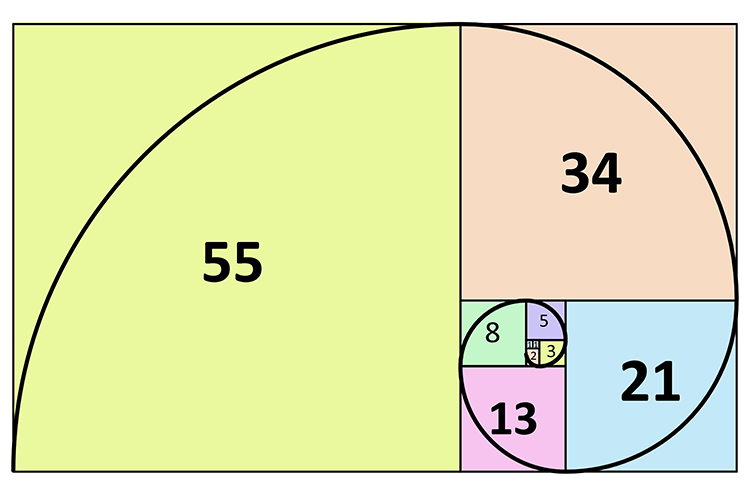

Memoization(메모이제이션)

Memoization(메모이제이션)은 dynamic programming(동적 계획법) 문제를 풀 때 흔히 쓰이는 방법이다. 동적 계획법이란 문제의 정답이, 입력값의 더 작은 부분에 대해 동일한 문제의 정답으로 구성되어 있는(마치 위에서 설명한 피보나치 같은 문제) 문제를 의미한다. 동적 계획법 문제를 풀기 위한 또다른 일반적인 방법은 Bottom-up이 있는데, 보통 이것이 더 깔끔하고 더 효율적이다.

Memoization은 주어진 입력값에 대한 결과를 저장함으로써 같은 입력값에 대해 함수가 한 번만 실행되는 것을 보장한다(보통 딕셔너리에 저장한다).

예를 들어보자. n번째 피보나치 수를 계산하는 간단한 재귀식을 보자:

In [5]:
def fib(n):
    if n < 0:
        raise IndexError(
        	'Index was negative.'
            'No such thing as a negative index in a series.'
        )
    elif n in [0, 1]:
        # Base cases
        return n
    
    print("computing fib(%i)" % n)
    return fib(n - 1) + fib(n - 2)

In [ ]:
fib(10)

이 것은 같은 입력값에 대해 여러번 실행하게 된다.


우리는 이 함수의 재귀호출을 트리 형태로 상상해볼 수 있다. 노드의 두 자식들이 노드가 만들어내는 두 재귀호출이 되는 것이다. 우리는 트리가 걷잡을 수 없이 빠르게 가지를 뻗어가는 것을 볼 수 있다.

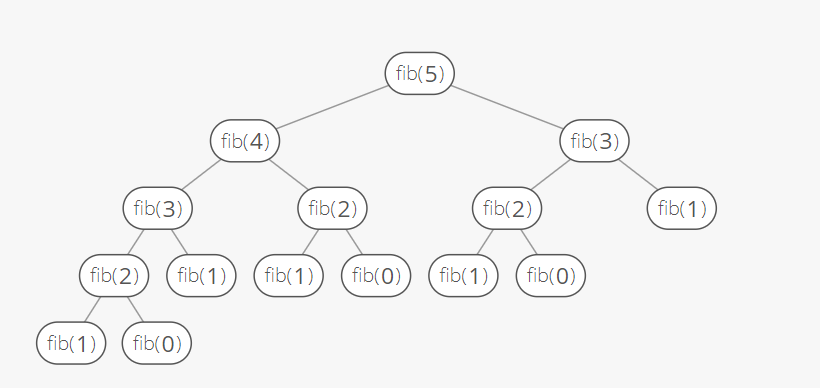

이렇게 가지를 뻗어나감으로써 발생되는 반복 작업을 피하기 위해서는, 입력값을 출력값과 매핑해주는 memo 라는 속성을 가진 클래스로 함수를 감싸야한다.

그렇다면 우리는 단순히

memo를 체크함으로써 어떤 주어진 입력값에 대해 계산을 안 해도 되는지 확인할 수 있고,
계산 결과를 memo에 저장할 수 있다.

In [3]:
class Fibber(object):
    
    def __init__(self):
        self.memo = {}
        
    def fib(self, n):
        if n < 0:
            raise IndexError(
                'Index was negative.'
                'No such thing as a negative index in a series.'
            )
        
        # Base cases    
        elif n in [0, 1]:
            return n
        
        # 이미 계산한 값인지 아닌지 확인한다. 
        elif n in self.memo:
            print ("grabbling memo[%i]" % n)
            return self.memo[n]
        
        print("computing fib(%i)" % n)
        result = self.fib(n - 1) + self.fib(n - 2)
    	
        # Memoize
        self.memo[n] = result
        
        return result

In [8]:
p1 = Fibber()

In [ ]:
p1.fib(100)

재귀 트리에서, 노드는 두 번 이상 나타나지 않는다 .

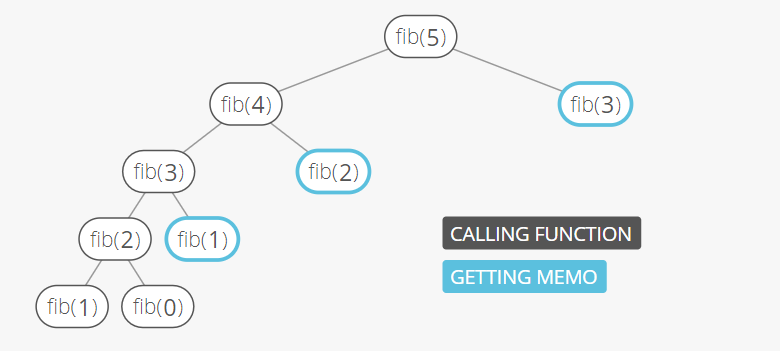

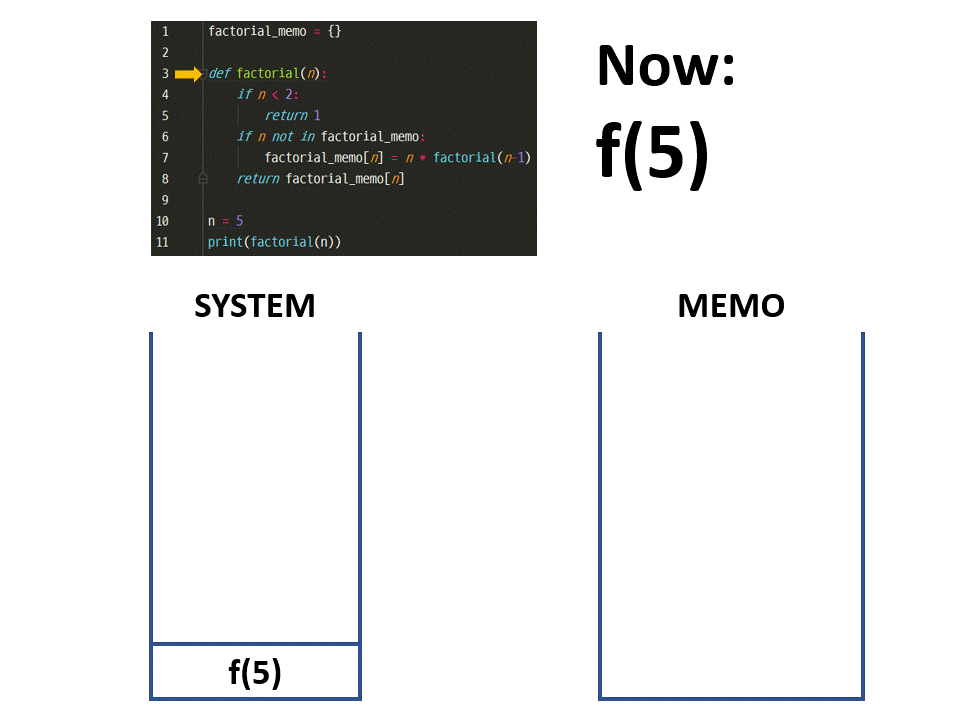

In [1]:
# 메모장!
factorial_memo = {}

# memoization을 이용한 팩토리얼
def factorial_with_memo(n):
    if n<2:
        return 1
    if n not in factorial_memo:
        factorial_memo[n] = n * factorial_with_memo(n - 1)
    return factorial_memo[n]

# 그냥 팩토리얼
def factorial(n):
    if n < 2:
        return 1
    return n * factorial(n - 1)


#####################팩토리얼 100!을 1000번 반복해보기#####################
from timeit import  *
t1 = Timer("factorial_with_memo(100)", "from __main__ import factorial_with_memo").timeit(number=1000)
t2 = Timer("factorial(100)", "from __main__ import factorial").timeit(number=1000)

print(t1, "vs", t2)
# 결과 : 0.0002186 vs 0.017931199999999998
# (시간 단위: 초)

0.0004930500000170923 vs 0.03336975799999209
